Student ID: s223415148<br>
Student name: Kunhee Han<br>
Workshop: friday 8am - 10am

# Part 1

## 1.1

1.1.1

In [11]:
!pip install wget # Installing wget

# The 'wget' package is a Python implementation of the popular command-line download tool.
# It allows you to download files from the internet programmatically within your Python scripts.

!pip install pyspark # Installing PySpark

# The 'pyspark' package is the Python API for Apache Spark, a distributed computing framework.
# PySpark enables you to process large datasets efficiently across a cluster of computers,
# making it an essential tool for big data analytics and processing tasks in Python.


In [21]:
from google.colab import files

# This will prompt you to select a file from your local filesystem
uploaded = files.upload()


Saving transactionrecord.csv to transactionrecord.csv


In [38]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import when

# Get the existing SparkContext
sc = SparkContext.getOrCreate()

# Initialize SQLContext
sqlContext = SQLContext(sc)

# Path to the uploaded file
file_path = "transactionrecord.csv"  # The file is in the current directory after upload

# Read the CSV file into a DataFrame
spark_df = sqlContext.read.csv(file_path, header=True, inferSchema=True)

# Show the rows where 'CustomerNo' is 'NA'
na_rows = spark_df.filter(spark_df.CustomerNo == 'NA')
na_rows.show()

# the result shows there's no rows that has 'NA' on CustomerNo column.

# Replace 'NA' with '-1' in the 'CustomerNo' column
df = df.withColumn('CustomerNo', when(df.CustomerNo == 'NA', '-1').otherwise(df.CustomerNo))

# Show the DataFrame after replacement
df.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|SetOfWoodenMarket...| 257.64|
|       581475|12/9/2019|    22596|Christmas St

1.1.2

In [39]:
from pyspark.sql.functions import regexp_replace, col  # Importing the necessary functions


# Process the 'productName' column to remove non-alphabet characters
spark_df = spark_df.withColumn('productName_process', regexp_replace(col('productName'), '[^a-zA-Z]', ''))

# Show the first 5 rows
spark_df.select('productName', 'productName_process').show(5)

+--------------------+--------------------+
|         productName| productName_process|
+--------------------+--------------------+
|Set Of 2 Wooden M...|SetOfWoodenMarket...|
|Christmas Star Wi...|ChristmasStarWish...|
|Storage Tin Vinta...|StorageTinVintage...|
|Tree T-Light Hold...|TreeTLightHolderW...|
|Set Of 4 Knick Kn...|SetOfKnickKnackTi...|
+--------------------+--------------------+
only showing top 5 rows



## 1.2

1.2.1

In [40]:
from pyspark import SparkContext  # Correct import for SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col

# Calculate the revenue as price * Quantity and cast it to float
spark_df = spark_df.withColumn('revenue', (col('price') * col('Quantity')).cast('float'))

# Show the top 5 rows with the calculated revenue
spark_df.select('price', 'Quantity', 'revenue').show(5)

+-----+--------+-------+
|price|Quantity|revenue|
+-----+--------+-------+
|21.47|      12| 257.64|
|10.65|      36|  383.4|
|11.53|      12| 138.36|
|10.65|      12|  127.8|
|11.94|       6|  71.64|
+-----+--------+-------+
only showing top 5 rows



1.2.2

In [43]:
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
df = spark_df.toPandas()

# Convert the 'Date' column to a datetime format and create the 'transaction_date' column
df['transaction_date'] = pd.to_datetime(df['Date'])

# Show the top 5 rows of the Pandas DataFrame
print(df.head())

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

  Product_category  Price  Quantity  CustomerNo         Country  \
0              0ca  21.47        12       17490  United Kingdom   
1              0ca  10.65        36       13069  United Kingdom   
2              0ca  11.53        12       13069  United Kingdom   
3              0ca  10.65        12       13069  United Kingdom   
4              0ca  11.94         6       13069  United Kingdom   

               productName_process     revenue transaction_date  
0          SetOfWoodenMarketCrates  257.640015       2019-12-09  
1 

1.2.3

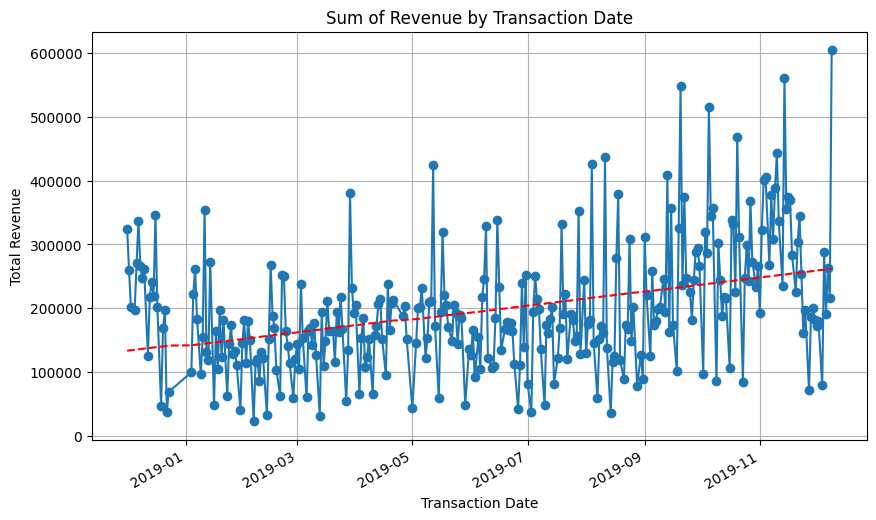

In [47]:
import matplotlib.pyplot as plt
import numpy as np


# Group by 'transaction_date' and calculate the sum of 'revenue'
revenue_by_date = df.groupby('transaction_date')['revenue'].sum()

# Plot the sum of revenue by date
plt.figure(figsize=(10, 6))
revenue_by_date.plot(kind='line', marker='o')

# Calculate the trend line (using NumPy's polyfit for a linear trend)
z = np.polyfit(range(len(revenue_by_date)), revenue_by_date.values, 1)
p = np.poly1d(z)

# Plot the trend line in red
plt.plot(revenue_by_date.index, p(range(len(revenue_by_date))), "r--", label='Trend Line')


# Add title and labels
plt.title('Sum of Revenue by Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.grid(True)

# Display the plot
plt.show()

The revenue data shows considerable fluctuations with multiple outliers, indicating instability over time. However, the upward trend is evident, as depicted by the red trend line, suggesting that despite the volatility, revenue is generally increasing.